### Import Modules

In [1]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
sys.path.append("..")
from lpp_utils import *
from nilearn import datasets, plotting
import nilearn.connectome
from scipy.spatial.distance import squareform
import seaborn as sns


### Explore individual results

In [8]:
sns.set_context("poster", font_scale = .9, rc={"grid.linewidth": 0.6})


d = np.load('../../data_lpp/fmri_data/other/shen_pauli_aan_dict.npy', allow_pickle=True).item()
print(d[90]) #['data_array_index']

#file = open('../../data_lpp/fmri_data/other/all293_masker_pickled.obj', 'rb') 
#all293_masker_reopened = pickle.load(file)
#file.close();
#all293_masker_reopened

{'coords': [6.3299270072992755, -57.185401459854006, 38.08759124087591], 'name': '83.65% Precuneous_Cortex; 16.35% Cingulate_Gyrus_posterior_division', 'index_label': 90, 'data_array_index': 89}


{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole', 'index_label': 6, 'data_array_index': 5}
(308, 293, 50)
(308, 293, 27)
(308, 293, 33)
13
16
25
0.4380756384680864
0.384767624054465
0.5221511433720574


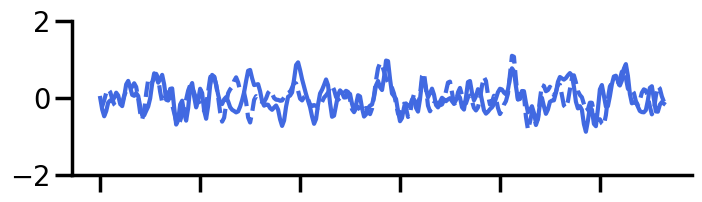

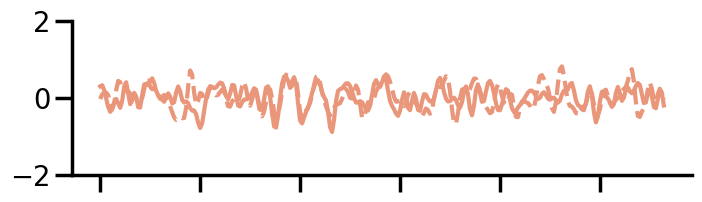

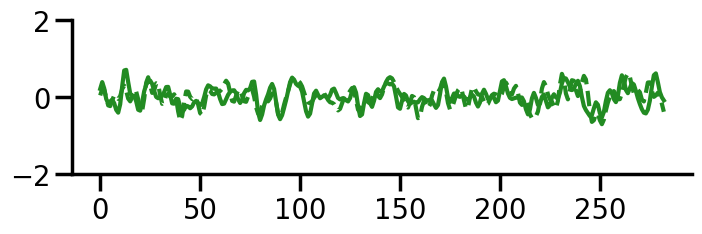

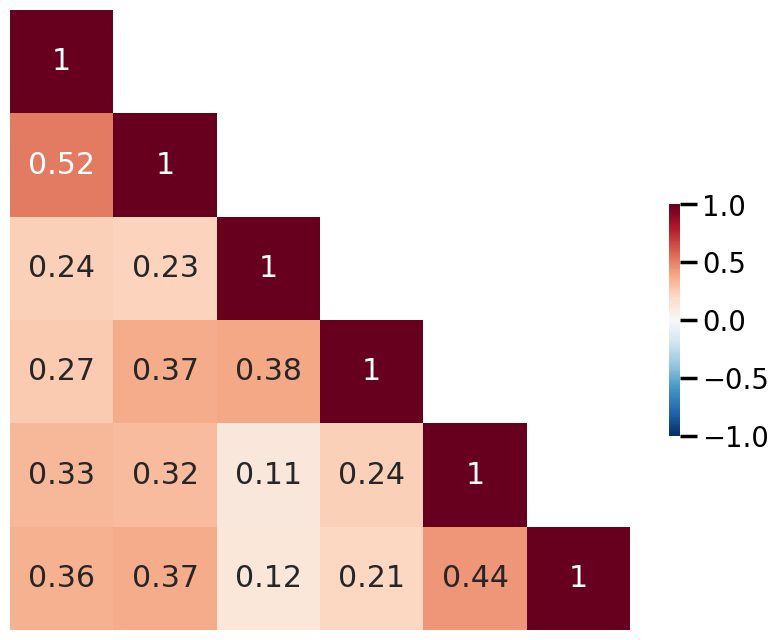

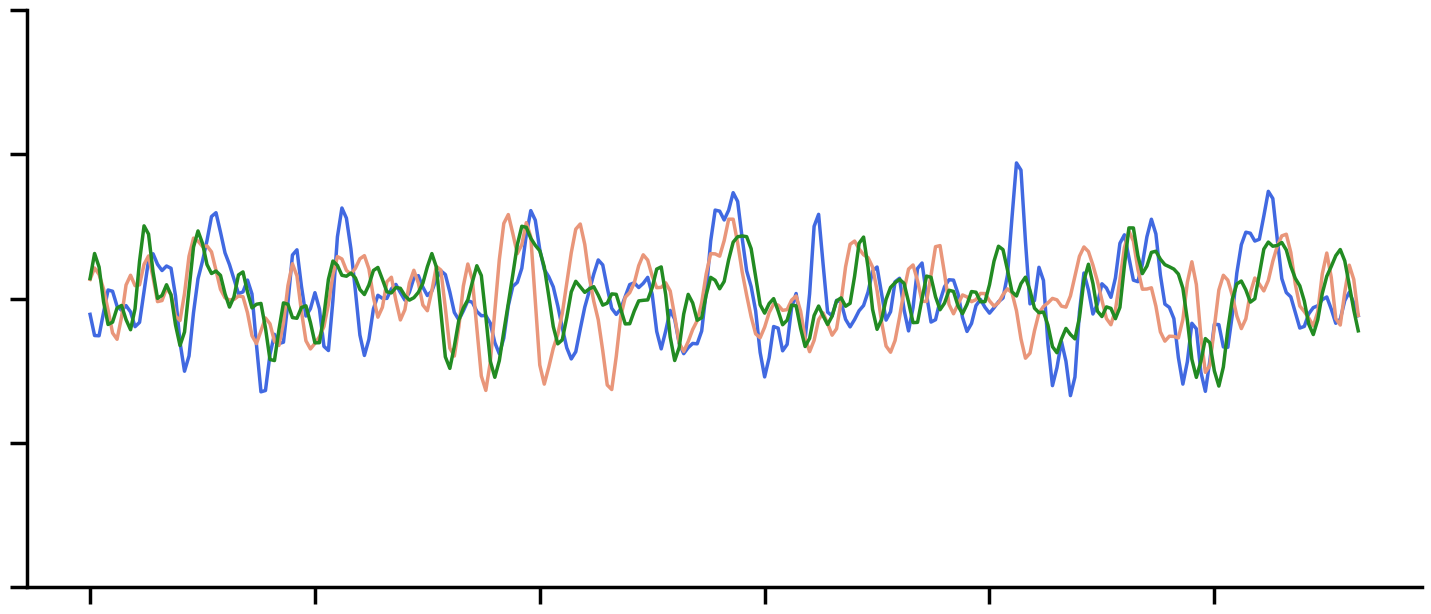

In [19]:

roi              = 5
curr_run         = 3 #the fourth run
curr_target_size = 308
print(d[roi+1])


data_en = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppEN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
data_fr = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppFR-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
data_cn = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppCN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
print(data_en.shape)
print(data_fr.shape)
print(data_cn.shape)

fr_half = int(data_fr.shape[2]/2)
print(fr_half)
    
cn_half = int(data_cn.shape[2]/2)
print(cn_half)
    
en_half = int(data_en.shape[2]/2)
print(en_half)


fr1 = np.mean(data_fr[15:-10,:, :fr_half], axis=2)
fr2 = np.mean(data_fr[15:-10,:, fr_half:], axis=2)
fr_all = np.mean(data_fr[15:-10,:,:], axis=2)

cn1 = np.mean(data_cn[15:-10,:, :cn_half], axis=2)
cn2 = np.mean(data_cn[15:-10,:, cn_half:], axis=2)
cn_all = np.mean(data_cn[15:-10,:,:], axis=2)

en1 = np.mean(data_en[15:-10,:, :en_half], axis=2)
en2 = np.mean(data_en[15:-10,:, en_half:], axis=2)
en_all = np.mean(data_en[15:-10,:,:], axis=2)

    
plt.figure(figsize = (8,2))
plt.plot(fr1[:,roi], color='royalblue');
plt.plot(fr2[:,roi], color='royalblue', linestyle = 'dashed');
plt.ylim([-2,2])
a = plt.gca()
xax = a.set_xticklabels([])
sns.despine()
    
print(np.corrcoef(fr1[:,roi], fr2[:,roi])[0,1])
       
plt.figure(figsize = (8,2))
plt.plot(cn1[:,roi], color='darksalmon');
plt.plot(cn2[:,roi], color='darksalmon', linestyle = 'dashed');
plt.ylim([-2,2])
a = plt.gca()
xax = a.set_xticklabels([])
sns.despine()
    
print(np.corrcoef(cn1[:,roi], cn2[:,roi])[0,1])
    
plt.figure(figsize = (8,2))
plt.plot(en1[:,roi], color='forestgreen');
plt.plot(en2[:,roi], color='forestgreen', linestyle = 'dashed');
#plt.title('Run' + str(curr_run+1))
plt.ylim([-2,2])
sns.despine()
print(np.corrcoef(en1[:,roi], en2[:,roi])[0,1])
  
    
allr = np.stack([en1[:,roi], en2[:,roi], cn1[:,roi], cn2[:,roi], fr1[:,roi], fr2[:,roi]])
allr_corr = np.corrcoef(allr)

v_val = 1.
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(allr_corr, dtype=bool), k=1)
sns.heatmap(allr_corr, mask=mask, 
            cmap = "RdBu_r", vmax= v_val, vmin = -v_val,
            square=True, linewidths=.00, annot = True, cbar_kws={"shrink": .3},)
plt.xticks([]);
plt.yticks([]);


plt.figure(figsize = (18,7.5))
plt.plot(fr_all[:,roi], color='royalblue', linewidth = 2.5);
plt.plot(cn_all[:,roi], color='darksalmon', linewidth = 2.5);
plt.plot(en_all[:,roi], color='forestgreen', linewidth = 2.5);

plt.ylim([-2, 2])
a = plt.gca()
xax = a.set_xticklabels([])
plt.yticks([-2, -1, 0, 1, 2]);

yax = a.set_yticklabels([])

sns.despine()

In [ ]:
fr_all.shape

In [ ]:
all_c = np.stack([fr_all[:,roi],
                    cn_all[:,roi],
                    en_all[:,roi]])
all_c.shape

In [ ]:
corr_avg = np.corrcoef(all_c)
str(np.round(corr_avg[np.triu_indices(3, k=1)],2))

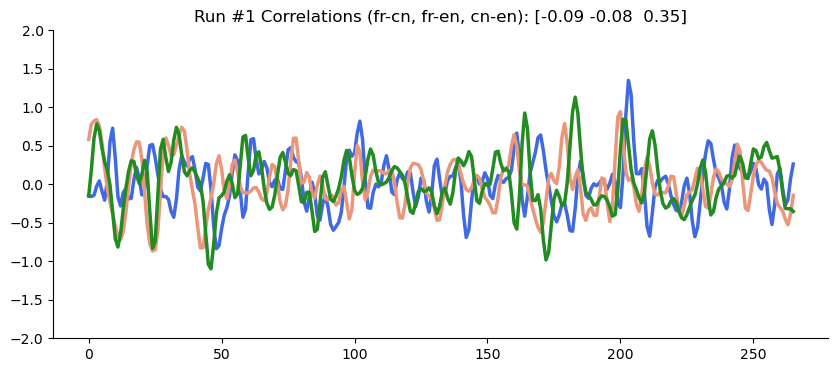

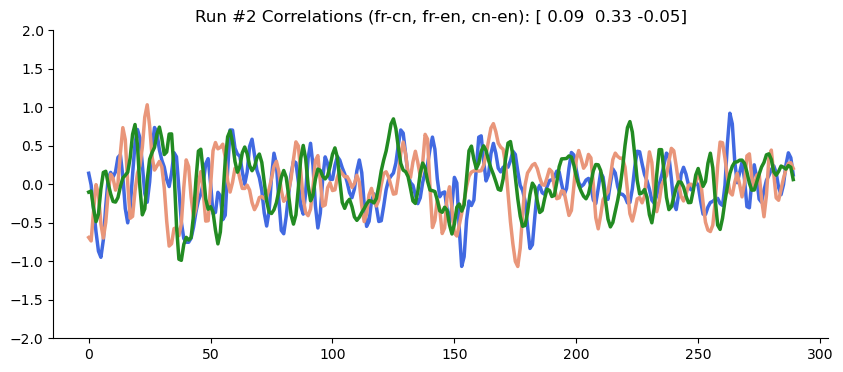

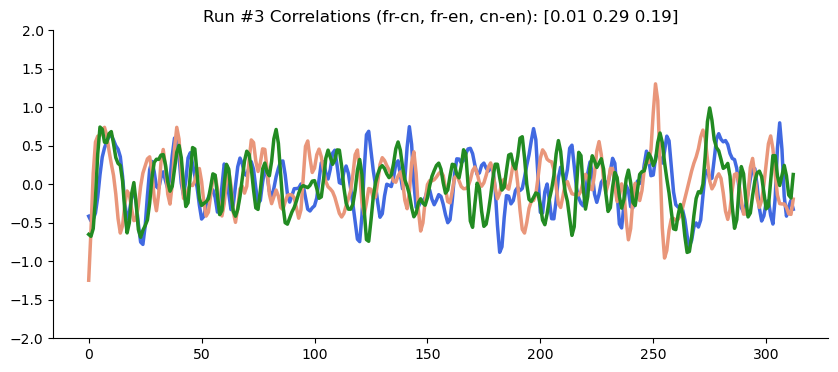

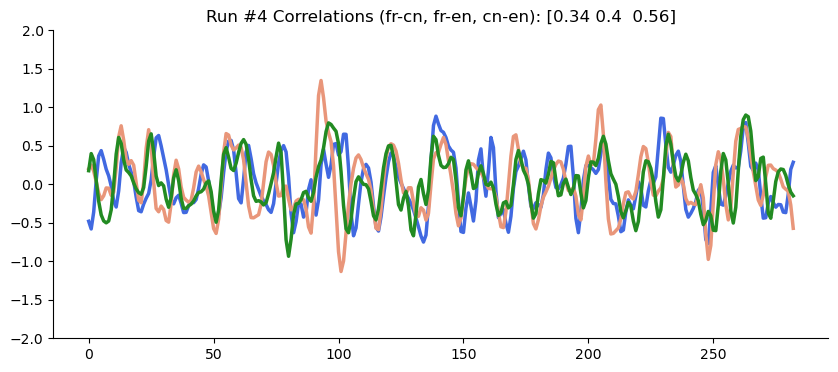

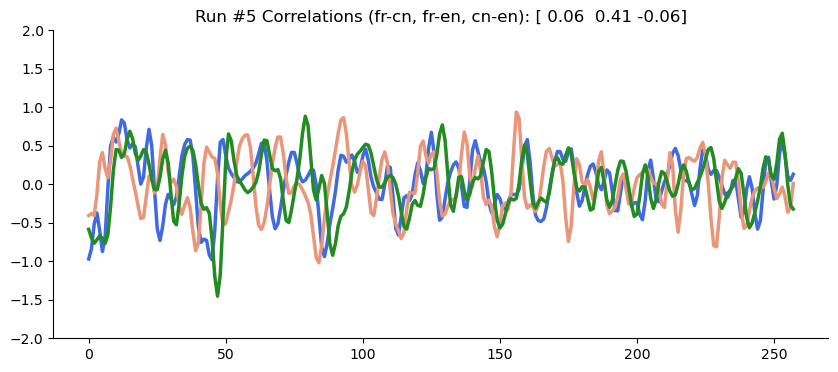

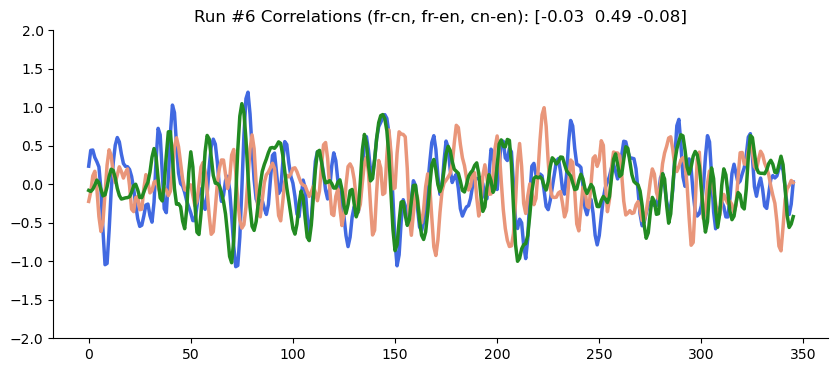

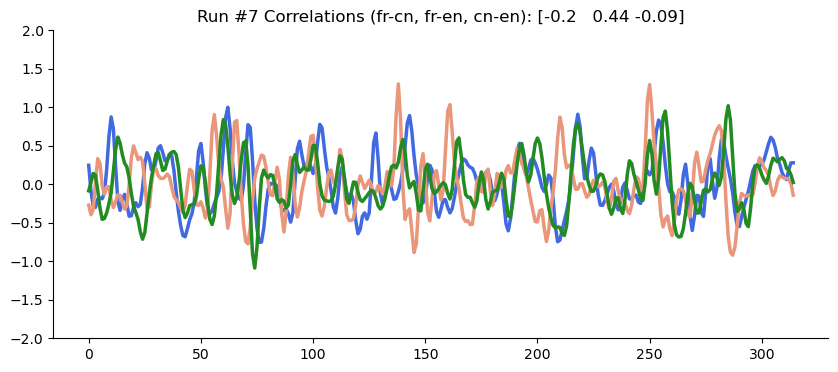

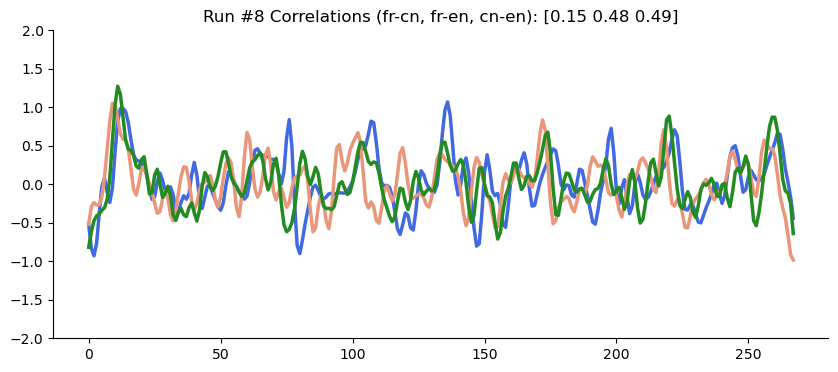

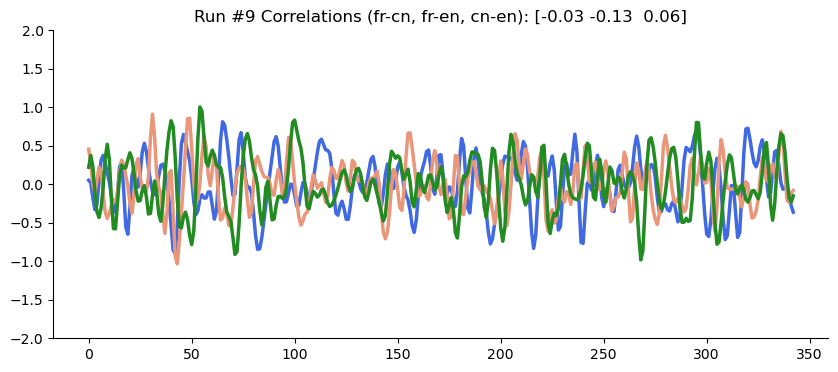

In [3]:
roi = 89
target_size = [291, 315, 338, 308, 283, 371, 340, 293, 368]
corrs = []

for curr_run in range(9):
    
    curr_target_size = target_size[curr_run]

    data_en = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppEN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    data_fr = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppFR-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    data_cn = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppCN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")

    fr_all = np.mean(data_fr[15:-10,:,:], axis=2)
    cn_all = np.mean(data_cn[15:-10,:,:], axis=2)
    en_all = np.mean(data_en[15:-10,:,:], axis=2)
    
    
    all_c = np.stack([fr_all[:,roi],
                    cn_all[:,roi],
                    en_all[:,roi]])
    
    corr_avg = np.corrcoef(all_c)
    
    corrs.append(  np.mean(np.round(corr_avg[np.triu_indices(3, k=1)],2))) 

    plt.figure(figsize = (10,4))
    plt.plot(fr_all[:,roi], color='royalblue', linewidth = 2.5);
    plt.plot(cn_all[:,roi], color='darksalmon', linewidth = 2.5);
    plt.plot(en_all[:,roi], color='forestgreen', linewidth = 2.5);
    plt.title('Run #' +str(curr_run+1) + ' Correlations (fr-cn, fr-en, cn-en): ' + str(np.round(corr_avg[np.triu_indices(3, k=1)],2)) )

    plt.ylim([-2, 2])
    sns.despine()
    plt.show()

In [4]:
corrs

[0.06,
 0.12333333333333335,
 0.16333333333333333,
 0.43333333333333335,
 0.13666666666666666,
 0.12666666666666665,
 0.049999999999999996,
 0.37333333333333335,
 -0.03333333333333333]

In [5]:
lengths = np.array([[282., 298., 340., 303., 265., 343., 325., 292., 368.],
       [309., 326., 354., 315., 293., 378., 332., 294., 336.],
       [283., 322., 322., 307., 293., 392., 364., 293., 401.]])

lengths

array([[282., 298., 340., 303., 265., 343., 325., 292., 368.],
       [309., 326., 354., 315., 293., 378., 332., 294., 336.],
       [283., 322., 322., 307., 293., 392., 364., 293., 401.]])

In [6]:
amount_resampling = np.std(lengths, axis=0)

In [7]:
np.corrcoef(amount_resampling, corrs)

array([[ 1.        , -0.86747318],
       [-0.86747318,  1.        ]])

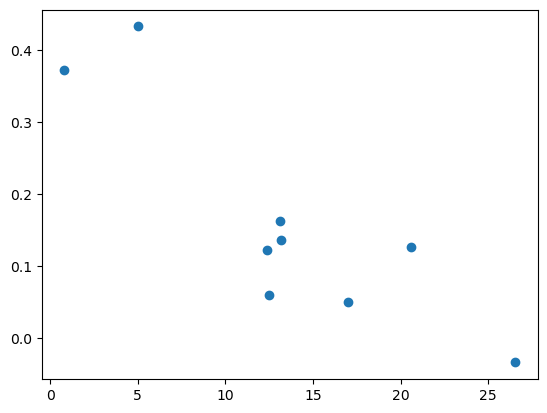

In [8]:
plt.scatter(amount_resampling, corrs)